In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def versus_plot(no_pretrain_train_loss, pretrain_train_loss, no_pretrain_test_loss, pretrain_test_loss,
        no_pretrain_train_score, pretrain_train_score, no_pretrain_test_score, pretrain_test_score,
                l, n, d):

    plt.style.use('seaborn-deep')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    title = 'DNN Performance : '+l+' layers with '+n+' neurons trained on '+d+' images'
    fig.suptitle(title)

    ax1.plot(no_pretrain_train_loss, color='#ffc001', label='No Pretraining Train set')
    ax1.plot(pretrain_train_loss, color='#c3d5e8', label='Pretraining Train set')
    ax1.plot(no_pretrain_test_loss, color='#ffc001', linestyle='--', label='No Pretraining Test set')
    ax1.plot(pretrain_test_loss, color='#c3d5e8', linestyle='--', label='Pretraining Test set')
    ax1.set_xlabel("Nb of epochs")
    ax1.set_ylabel("Loss")
    ax1.grid()

    ax2.plot(no_pretrain_train_score, color='#ffc001')
    ax2.plot(pretrain_train_score, color='#c3d5e8')
    ax2.plot(no_pretrain_test_score,  color='#ffc001', linestyle='--')
    ax2.plot(pretrain_test_score,  color='#c3d5e8', linestyle='--')
    ax2.set_xlabel("Nb of epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_ylim(0,1)
    ax2.grid()

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.show()
    
def barplot(results, x_label, y_label, xticks,loc='center right'):
    no_pretrain = []
    pretrain = []

    val = True
    for result in results:
        if val:
            no_pretrain.append(result.iloc[-1,:][-1])
            val = False
        else:
            pretrain.append(result.iloc[-1,:][-1])
            val = True

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)

    barWidth1 = 0.065
    barWidth2 = 0.032
    x_range = np.arange(len(no_pretrain) / 8, step=0.125)

    ax.bar(x_range, pretrain, color='#dce6f2', width=barWidth1/2, edgecolor='#c3d5e8', label='With pretraining')
    ax.bar(x_range, no_pretrain, color='#ffc001', width=barWidth2/2, edgecolor='#c3d5e8', label='Without pretraining')
    ax.set_ylim(0,1)
    for i, bar in enumerate(pretrain):
        ax.text(i / 8 - 0.02, bar + 0.02, bar, fontsize=12)

    ax.set_ylabel(x_label, fontsize=14)
    ax.set_xlabel(y_label, fontsize=14)
    plt.xticks(x_range, xticks)
    plt.tick_params(
        bottom=False,
        left=False,
        labelsize=12
    )
    ax.axhline(y=0, color='gray')
    ax.legend(loc=loc, prop={'size':14})  
    plt.box(False)
    plt.grid()
    # title = "Accuracy score in function of the number of data used \n comparing pretraining and random initialization"
    # fig.suptitle(title, fontsize=15)

    # plt.savefig('plt', bbox_inches = "tight")
    plt.show()

def load_results(pretrain, layer, neuron, data):
    
    results = []
    for l in layer:
        for n in neuron:
            for d in data:
                for p in pretrain:
                    results.append(pd.read_csv("../test_outputs/pretrain["+p+"]_layers["+l+"]_neurons["+n+"]_data["+d+"].csv"))
    return results

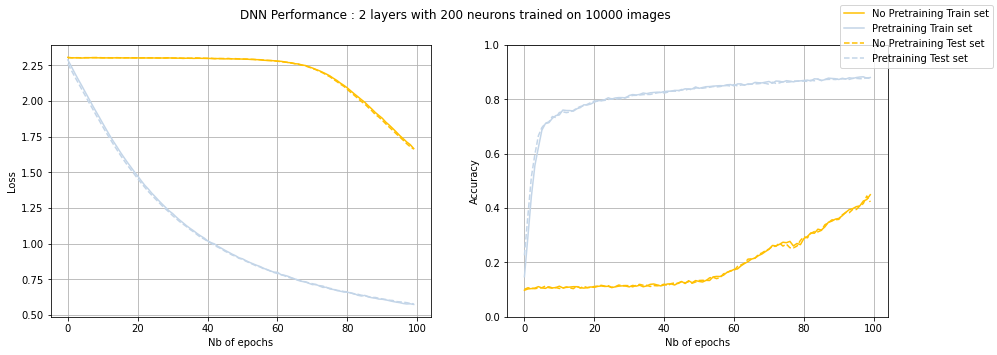

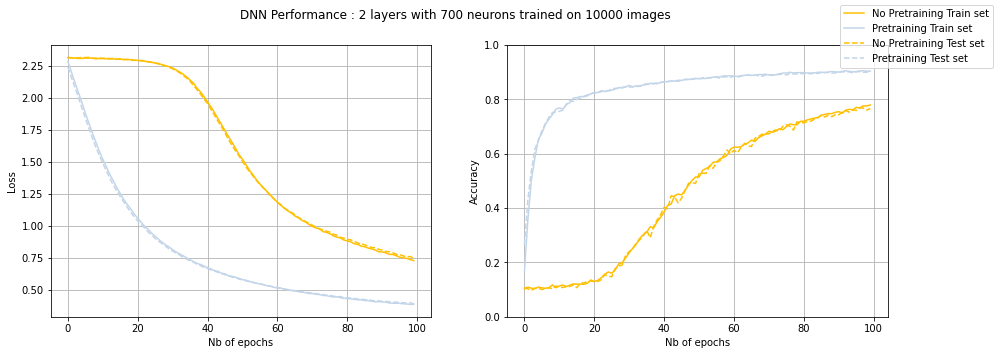

In [3]:
pretrain = ["False", "True"]
layer = ["2"]
neuron = ["200", "700"]
data = ["10000"]
results = load_results(pretrain, layer, neuron, data)

versus_plot(results[0].train_loss, results[1].train_loss, results[0].test_loss, results[1].test_loss,
           results[0].train_score, results[1].train_score, results[0].test_score, results[1].test_score,
            layer[0], n=neuron[0], d=data[0])

versus_plot(results[2].train_loss, results[3].train_loss, results[2].test_loss, results[3].test_loss,
           results[2].train_score, results[3].train_score, results[2].test_score, results[3].test_score,
            layer[0], n=neuron[1], d=data[0])

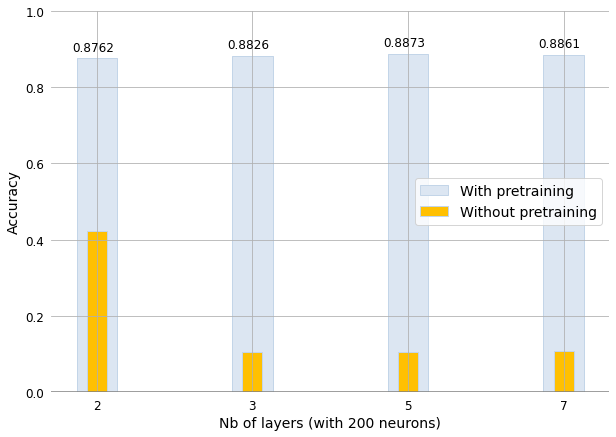

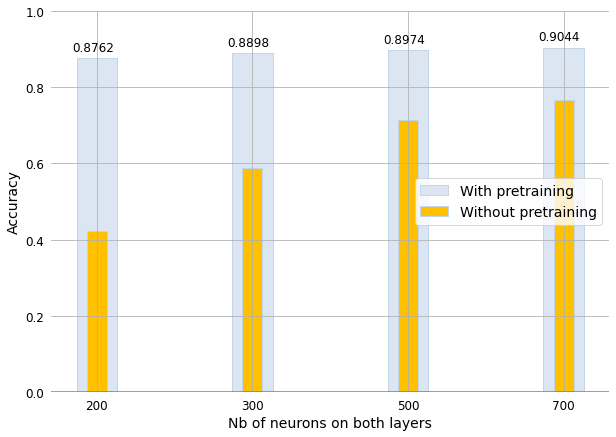

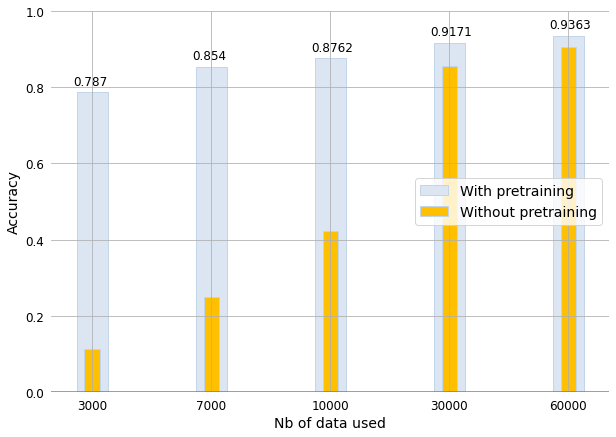

In [4]:
# figure 1

pretrain = ["False", "True"]
layer = ["2", "3", "5", "7"]
neuron = ["200"]
data = ["10000"]
results = load_results(pretrain, layer, neuron, data)

barplot(results, 'Accuracy', 'Nb of layers (with 200 neurons)', xticks=layer)

# figure 2

pretrain = ["False", "True"]
layer = ["2"]
neuron = ["200", "300", "500", "700"]
data = ["10000"]
results = load_results(pretrain, layer, neuron, data)

barplot(results, 'Accuracy', 'Nb of neurons on both layers', xticks=neuron)

# figure 3

pretrain = ["False", "True"]
layer = ["2"]
neuron = ["200"]
data = ["3000", "7000", "10000", "30000", "60000"]
results = load_results(pretrain, layer, neuron, data)

barplot(results, 'Accuracy', 'Nb of data used', xticks=data)